## EasyVisa Project
***Marks: 60***

## Problem Statement

### Context:

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (
    BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor)

from xgboost import XGBRegressor

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [2]:
visa = pd.read_csv("EasyVisa.csv")

In [3]:
# copying data to another variable to avoid changes to original data
data = visa.copy()

## Overview of Dataset

### View first and last 5 rows

In [4]:
data.head()  ## top 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail()  ## last 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand shape of dataset

In [6]:
# data.shape ## dimensions of the data

print(
    f"There are {data.shape[0]} rows and {data.shape[1]} columns in original dataset."
)

There are 25480 rows and 12 columns in original dataset.


In [7]:
data['case_status'].value_counts(normalize=True) # Certified = 1, Denied = 0

Certified    0.667896
Denied       0.332104
Name: case_status, dtype: float64

### Check data types of columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Check for duplicates and null values

In [9]:
# check for duplicate rows
data.duplicated().sum()

0

In [10]:
# check for null values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observations:

* There are 25,480 rows and 12 columns
* 3 numeric columns. Integer type: no_of_employees, yr_of_estab,  Float type: prevailing_wage 
* 9 non-numeric columns. Object: case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, unit_of_wage, full_time_position, and case_status
* case_id is unique id of each applicant
* No missing data in columns
* no duplicate or null values
* case_status is the target variable that needs to be predicted


## Exploratory Data Analysis

In [11]:
data.describe().T  ## statistical summary of numeric columns

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [12]:
data.describe(include="object").T  ## statistical summary of non-numeric columns

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


#### Observations: 

* Mean value of no_of_employees is 5667 and median, 2109 respectively. This implies a right-skewed distribution.
* Minimum no_of_employees is -26, this needs further investigation
* Maximum value of no_of_employees is 602,069
* Oldest employer has been established(yr_of_estab) since 1800, needs further investigation
* Newest employer was established from 2016
* Prevailing_wage shows a very wide range, from min 2 to max 319,210 units. needs further investigation.
* Mean prevailing wage is 74,455 units

******************************************************************************************************************

* case_id is unique identifier for employees
* 16,861 employees are from Asia
* Most employees have a Bachelor's degree (10,234)
* Most employees have some job experience (14,802)
* 22,525 applicants do not need job training
* 7195 employees are employed by Northeast region
* Annual wage is 22962 units
* Majority of applications are for full-time positions
* 17,018 visa applications are certified


#### Let's check unique category count in categorical variables

In [13]:
# list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Print unique value count in each column

for column in cat_col:
    print(f"Value Count for {column}")
    print(data[column].value_counts())
    print("-" * 50)

Value Count for case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Value Count for continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Value Count for education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Value Count for has_job_experience
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
Value Count for requires_job_training
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------

#### Statistical summary shows case_id column is unique to all 25480 rows, lets confirm the same

In [14]:
# checking number of unique values in case_id column
data["case_id"].value_counts()

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64

#### Drop case_id column before further analysis

In [15]:
## drop 'case_id' column before further analysis
data.drop(
    ["case_id"], axis=1, inplace=True
)

### Univariate Analysis

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

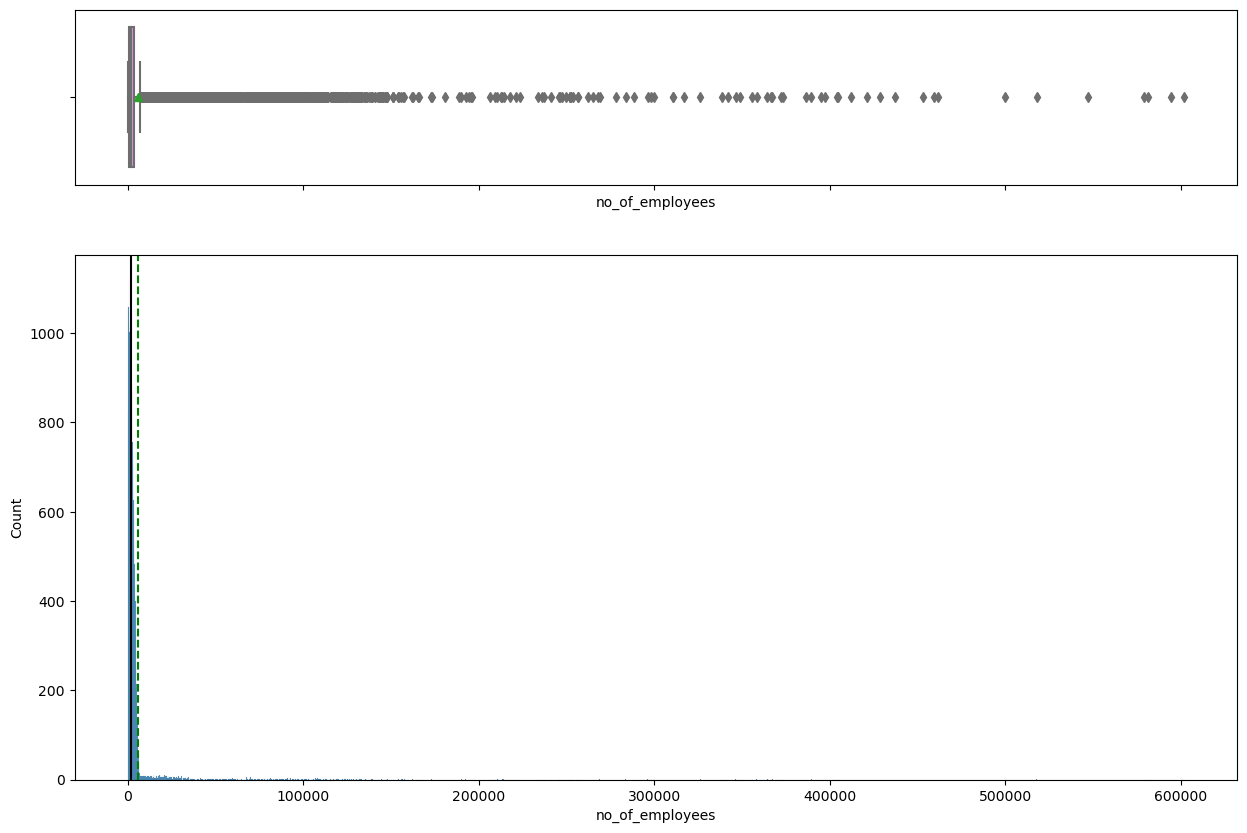

In [17]:
histogram_boxplot(data, "no_of_employees")

#### Observations on number of employees

* There is a wide range in the number of employees with a lot of upper outliers
* The distribution is heavily right-skewed


#### Observations on year of establishment

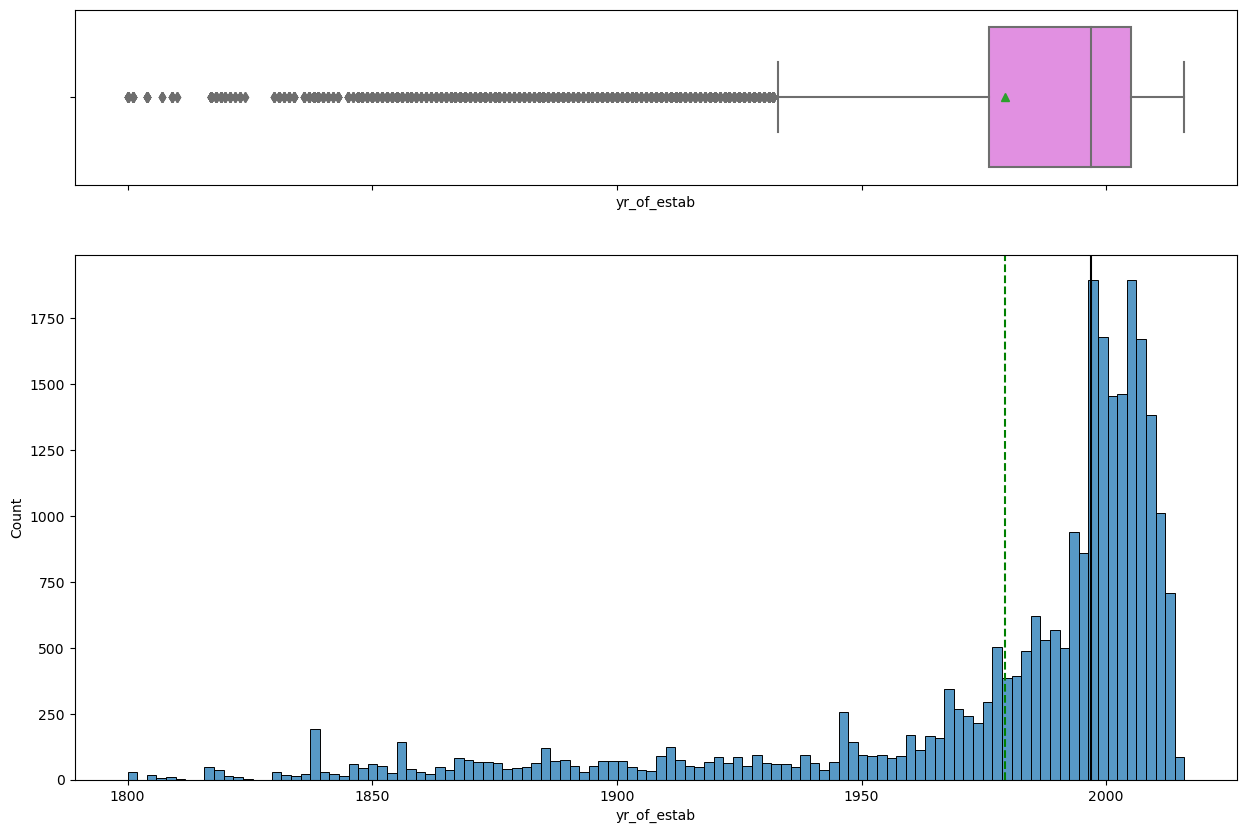

In [18]:
histogram_boxplot(data, "yr_of_estab")

#### Observations:

* Distribution is left skewed
* Oldest employer seems to be from 1800
* Most recent employer is from 2016, it might be useful to create a year_since_established column rather than using year of establishment of employer



#### Observations on prevailing wage

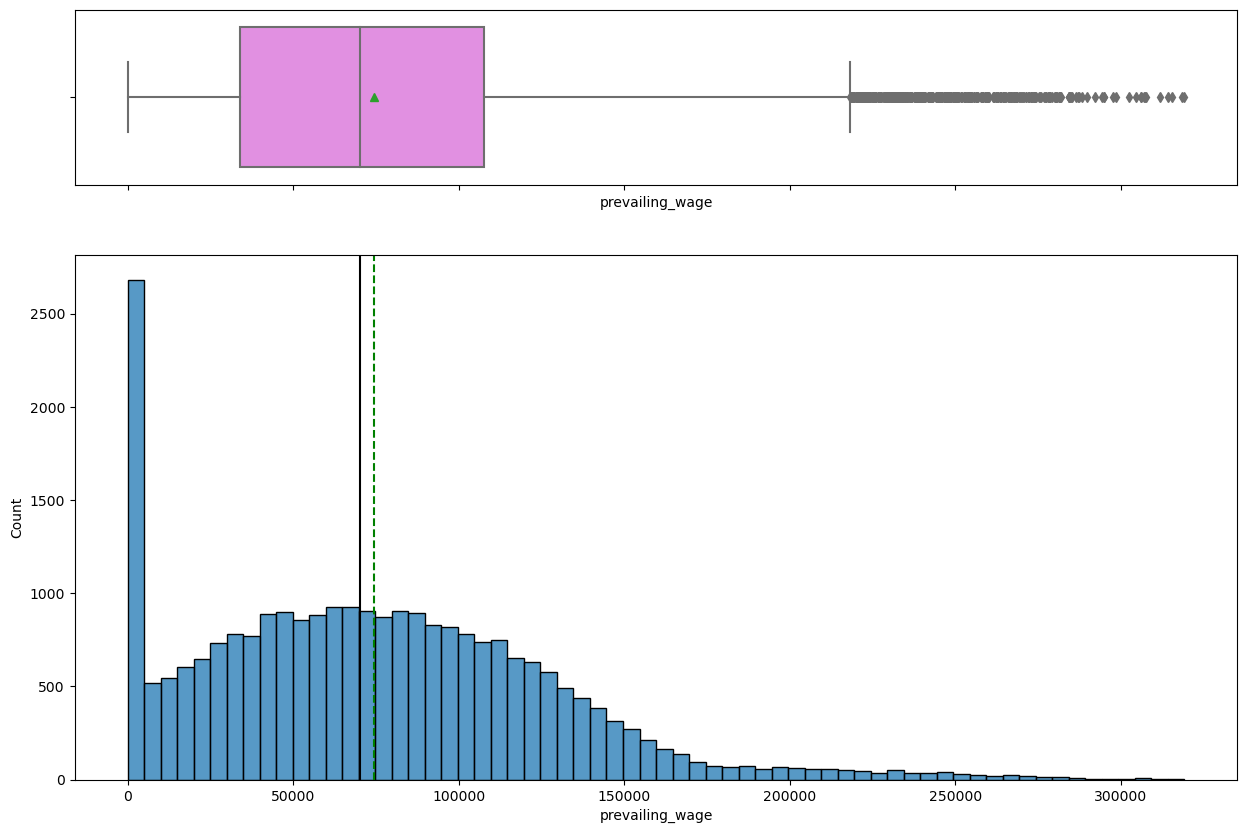

In [19]:
histogram_boxplot(data, "prevailing_wage")  ## histogram_boxplot for prevailing wage

In [20]:
# subset of dataframe with less than 100 prevailing wage
a = data.loc[data["prevailing_wage"] < 100]
a

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [21]:
# count of unique unit_of_wage with prevailing_wage < 100
a.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

In [22]:
# count of unique case_status values among less than 100 prevailing wage
a.loc[data["prevailing_wage"] < 100, "case_status"].value_counts()

Denied       123
Certified     53
Name: case_status, dtype: int64

#### Observations on prevailing wage:

* There are 176 rows with prevailing wage less than 100
* These are jobs with hourly pay rate
* Out of the 176 applications, only 30% (53) got certified
* It might be useful to create a new column to show hourly wage across all pay units. Helps normalize range of values for efficient model building


In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

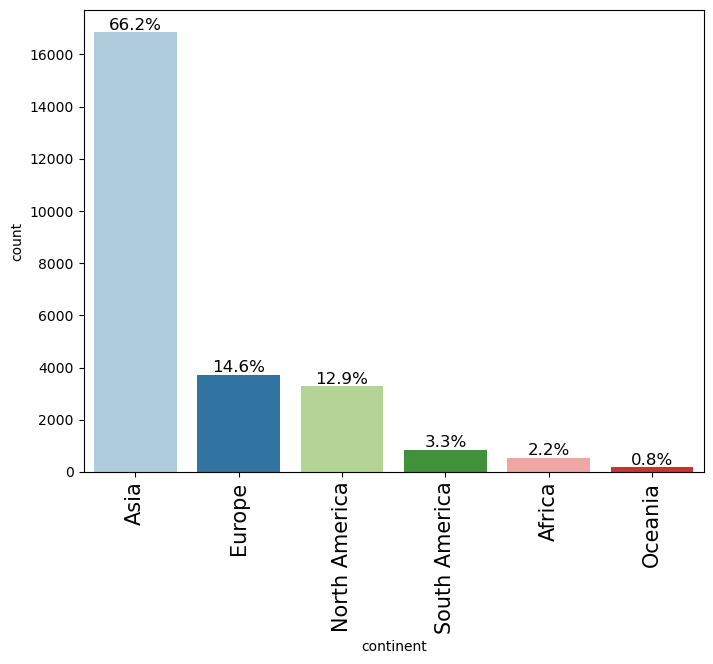

In [24]:
labeled_barplot(data, "continent", perc=True)

#### Observations:

* 66% of visa applicants are from Asia, which is understandable considering size of continent
* Europe contributes to 14.6% and North America contributes to 12.9% of applicants
* Oceania has less than 1% of applicants


#### Observations on education of employee

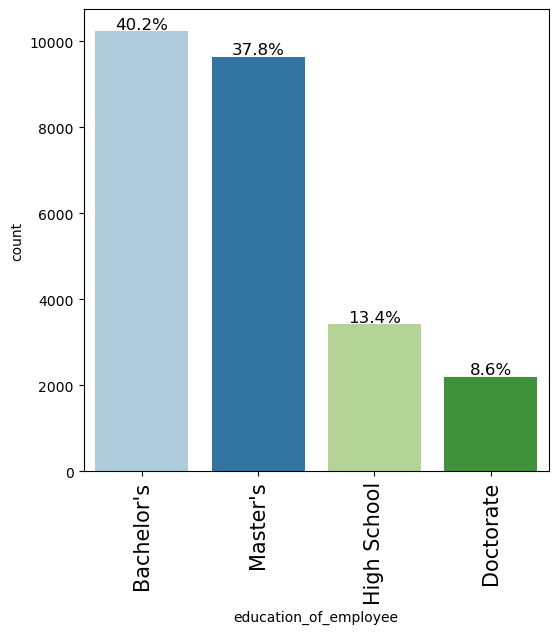

In [25]:
## labeled_barplot for education of employee
labeled_barplot(data, "education_of_employee", perc=True)

#### Observations:

* Majority of applicants have either bachelor's degrees (40.2%) or master's degrees (37.8%)
* Only 8.6% of applicants have doctorate degrees


#### Observations on job experience

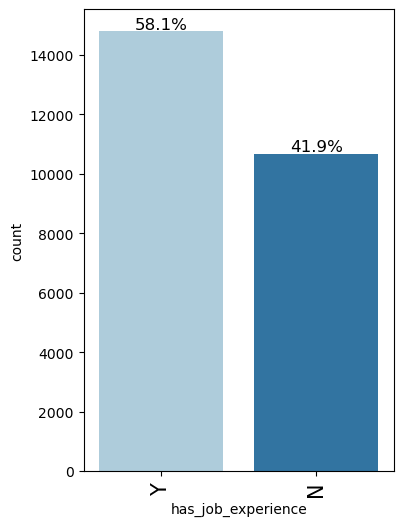

In [26]:
## labeled_barplot for job experience
labeled_barplot(data, "has_job_experience", perc=True)

#### Observations:

* More than half (58%) of applicants have some job experience


#### Observations on job training

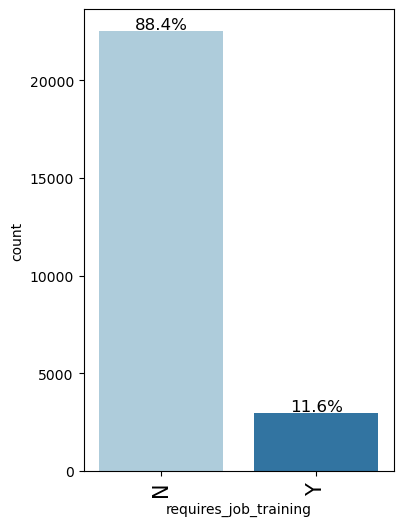

In [27]:
## labeled_barplot for job training
labeled_barplot(data, "requires_job_training", perc=True)

#### Observations:

* 88% of employees do not require job training


#### Observations on region of employment

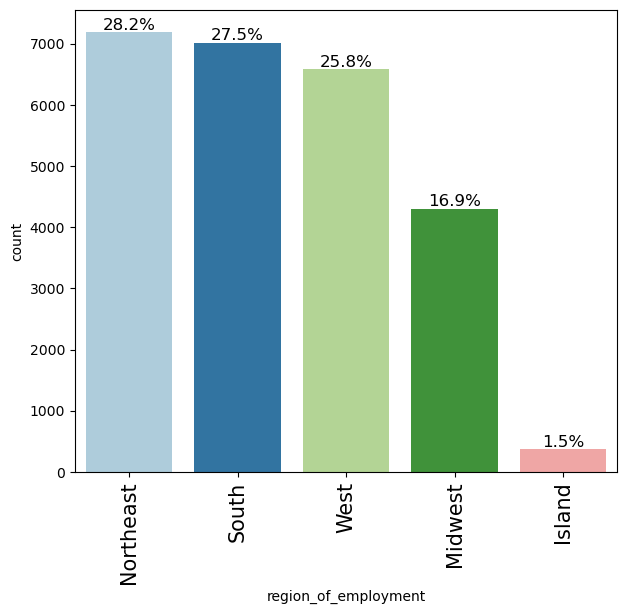

In [28]:
## labeled_barplot for region of employment
labeled_barplot(data, "region_of_employment", perc=True)

#### Observations:

* Northeast region makes up most of employee applications(28.2%), followed by South(27.5%), West(25.8%)and Midwest(16.9%). This is probably attributed to lot of jobs being available in Northeast and Southern regions that attracts foreign workers

* Island region has the lowest number (1.5%) of work visa applicants. This region does not offer lot of jobs for employees with certified visa


#### Observations on unit of wage

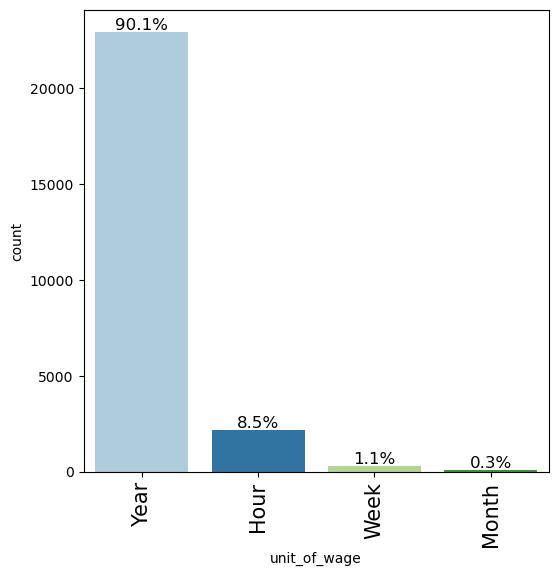

In [29]:
## labeled_barplot for unit of wage
labeled_barplot(data, "unit_of_wage", perc=True)

#### Observations

* 90% of applications are for jobs whose prevailing wages are computed yearly
* This is undertandable as these jobs require specilized skillset


#### Observations on case status

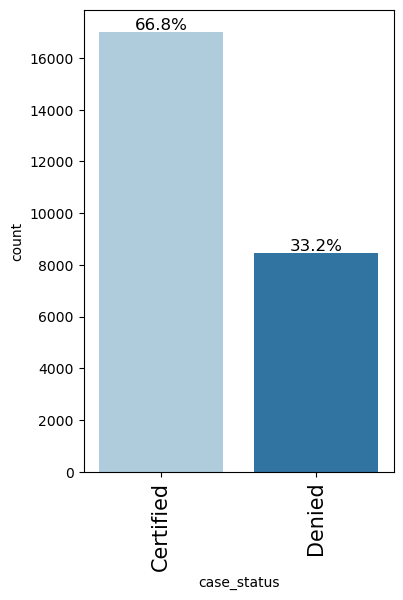

In [30]:
## labeled_barplot for case status
labeled_barplot(data, "case_status", perc=True)

#### Observations

* 67% of visa applications are certified, 33% denied


### Bivariate Analysis

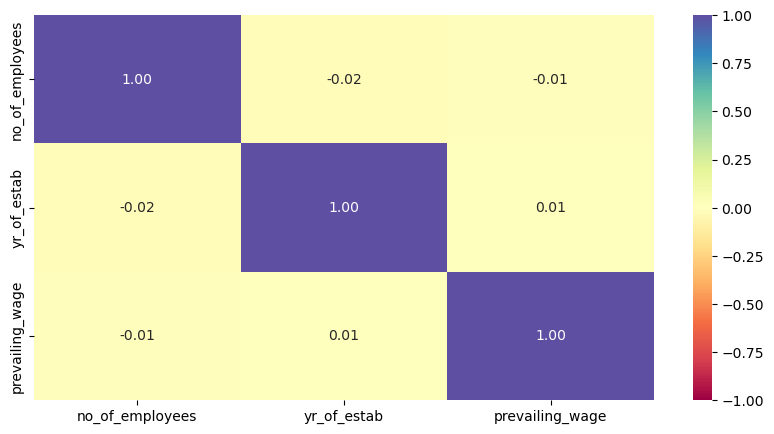

In [31]:
## heatmap to show correlation between variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


#### Observations:

* No correlation between variables observed


**Creating functions for further analysis**

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Leading Questions:

### 1.Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

#### Case status vs. Education

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


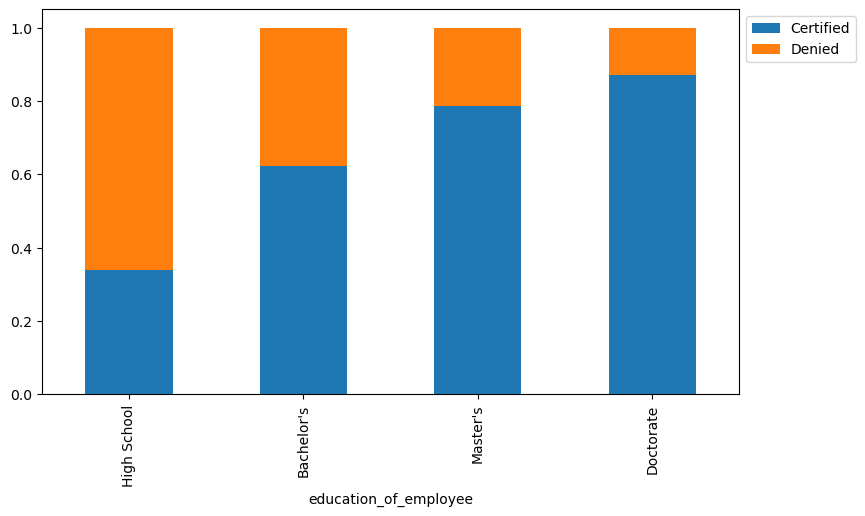

In [34]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Observations:

* Yes.Higher the education level of an applicant is, higher the chances of visa certification
* 87% of Doctorate degree applications are certified, 78% for Masters degree, 62% for Bachelors degree
* only 34% high school educated applicants are certified

### 2. How does visa status vary across different continents?

#### Case status vs Continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


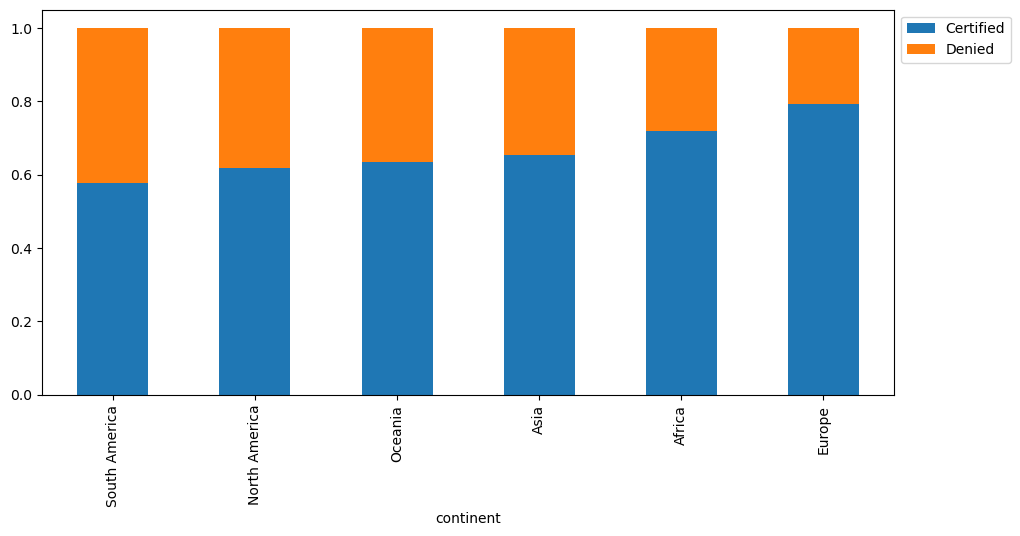

In [35]:
## stacked barplot for continent and case status
stacked_barplot(data, "continent", "case_status")

#### Observations:

* Europe has the highest visa certification rate (79%), followed by Africa(72%), Asia(65%), Oceania(63%)
* South America has the lowest visa certification rate (58%)


### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

#### Case status vs Work Experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


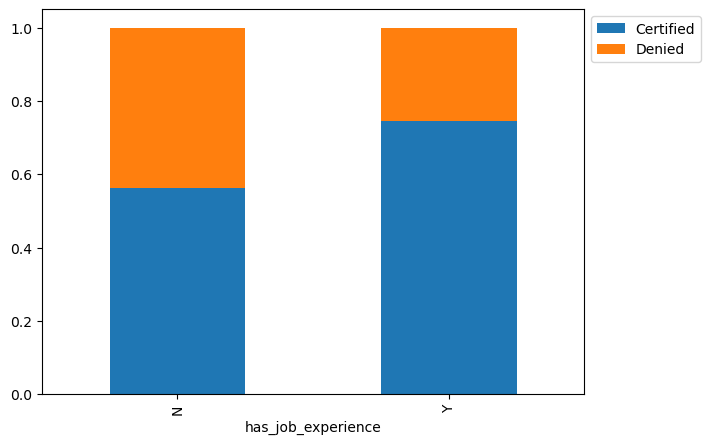

In [36]:
## stacked barplot for job experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

#### Observations:

* Yes! Having job experience does influence likelihood of visa certification 
* 74% of applicants with job experience receive visa certification
* Only 56% of applicants with no job experience receive certification


### 4. The prevailing wage has different units (Hourly, Weekly, etc). In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

#### Case status vs Unit of wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


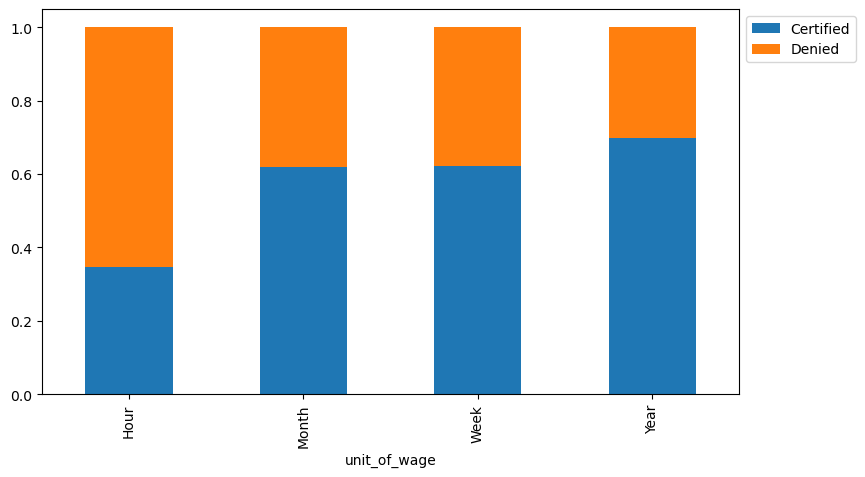

In [37]:
## stacked barplot for unit of wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

#### Observations:

* Annual wage unit is most likely to be certified (72%)
* 34% applicants who are paid by hour are certified
* 62% applicants of both weekly and monthly page wage units are certified


### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with prevailing wage ?

#### Case status vs prevailing_wage

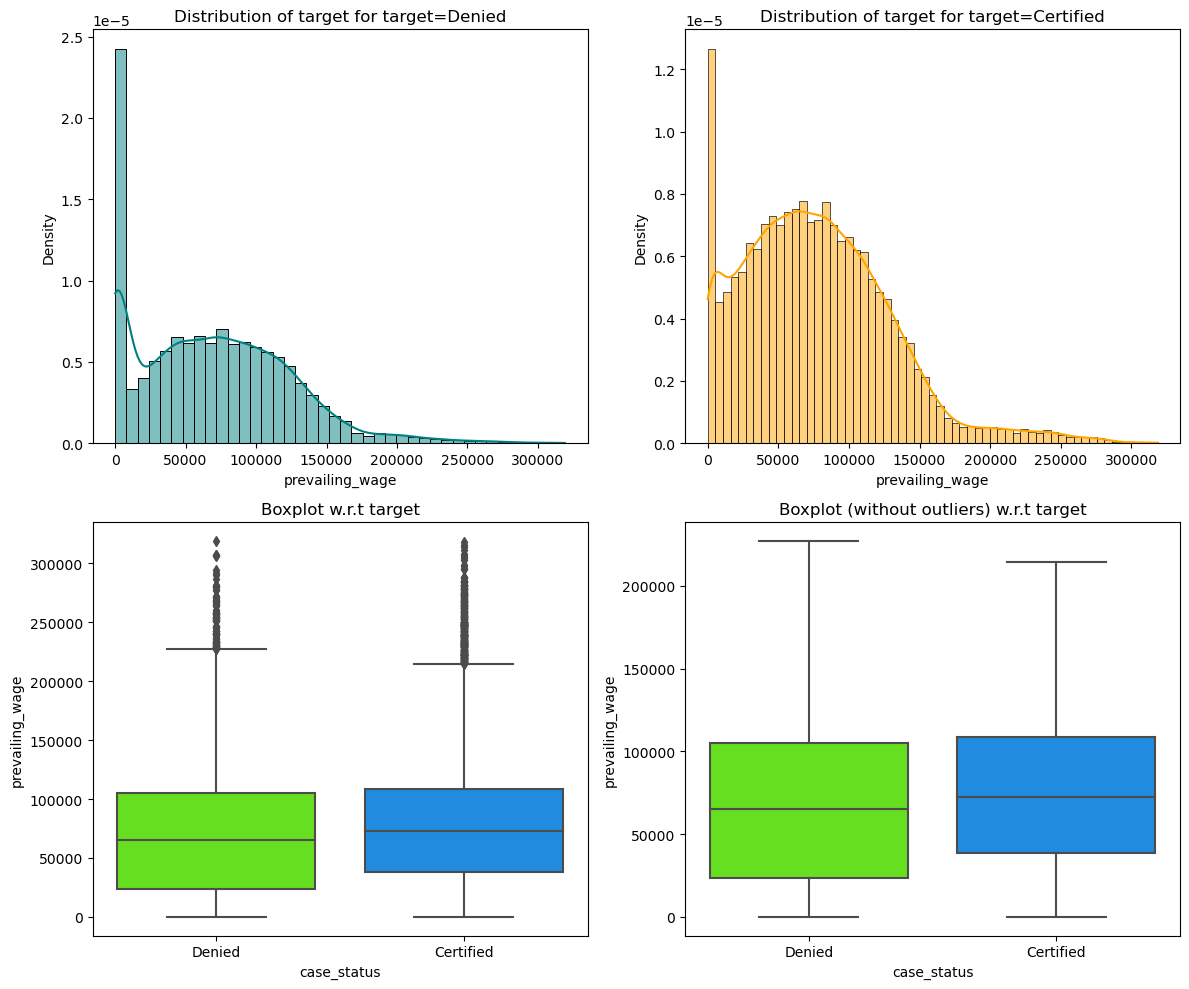

In [38]:
## distribution of prevailing wage and case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### Observations:

* Distribution of prevailing wages for certified confirms about 2/3rd of applications are certified
* Mean prevailing wage of certified workers is slightly higher than non-certified
* Median prevailing wage is about 75,000 US dollars


## Additional analysis

### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

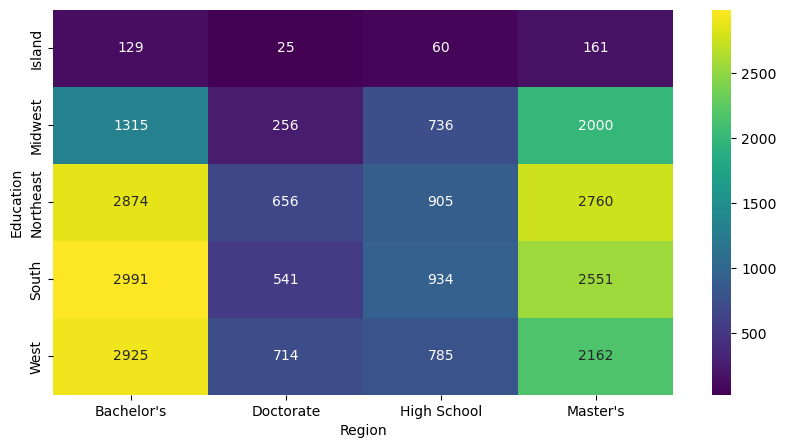

In [39]:
## heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(index = data['region_of_employment'],columns =data['education_of_employee']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Observations:

* Midwest employs highest number of Masters degree holders (46%), followed by Island
* West employs the highest number of Doctorate degree holders (33%)
* Northeast employs highest number of Bachelors degree holders (29%)
* South employs majority of highschool degree holders (28%)


#### Case status vs Region of employment

### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


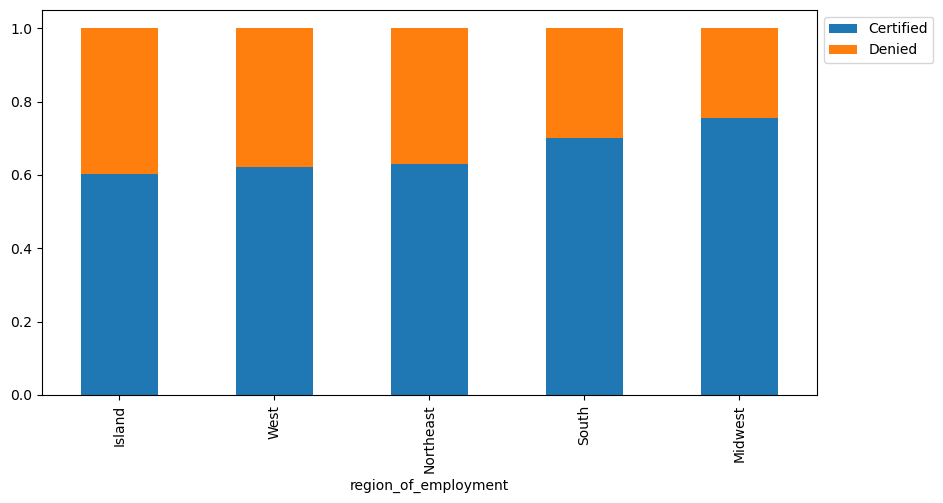

In [40]:
## stacked barplot for region of employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

#### Observations:

* Midwest(75%) and South(70%) region employers have the highest number of certifications
* Northeast, West regions have about 62% certifications with Island being the least certified(60%)


### Do the employees who have prior work experience require any job training?

#### Job training vs Prior job experience

has_job_experience         N      Y    All
requires_job_training                     
All                    10678  14802  25480
N                       8988  13537  22525
Y                       1690   1265   2955
------------------------------------------------------------------------------------------------------------------------


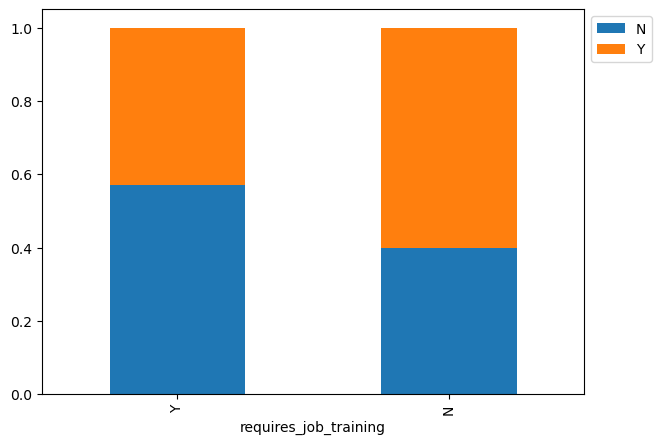

In [41]:
## stacked barplot for job experience and requires_job_training
stacked_barplot(data, "requires_job_training", "has_job_experience")

#### Observations:

* 16% of applicants with no job experience require job training
* Only 9% of applicants who have job experience , require job training


### Is prevailing wage similar across all regions of US ?

#### Prevailing wage vs Region of employment

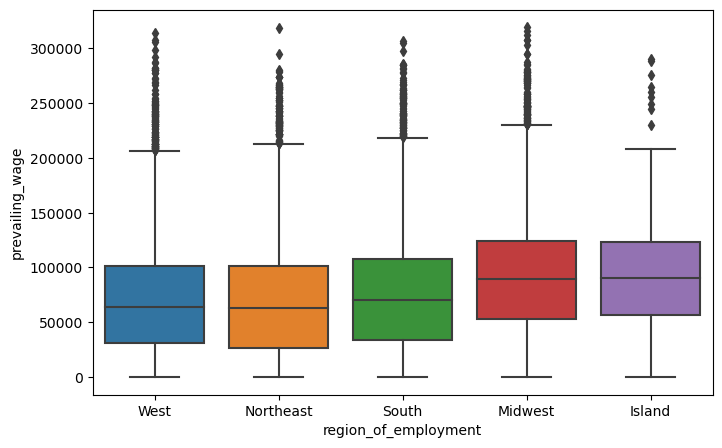

In [42]:
## boxplot for region of employment and prevailing wage
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

#### Observations:

* Midwest has the highest prevailing wages, followed by Island and South regions
* Northeast and West have the least prevailing wages


## Data Preprocessing

### Duplicate value check

In [43]:
# check for duplicate rows
data.duplicated().sum()

0

### Outlier detection

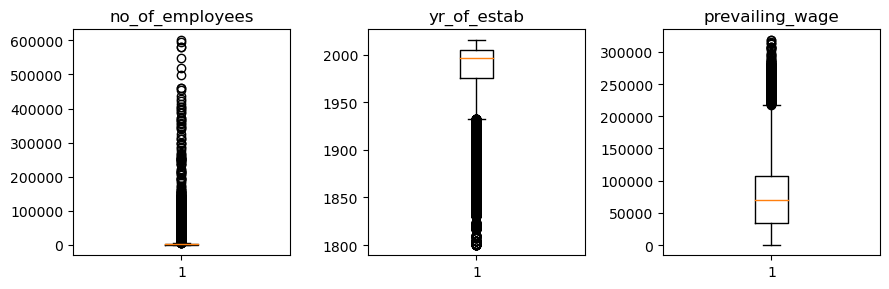

In [44]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

## boxplots for all the numeric columns with 1.5*IQR whiskers

plt.figure(figsize=(9, 3))

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()


#### Observations:

* Number of employees column has several upper outliers, but these are legitimate values as there are several companies in the US employing 100,0000+ employees. --> For sake of normalizing distribution, upper value can be capped
* Negative value in number of employees column is incorrect, needs to be replaced with absolute value
* yr_of_estab shows values as old as 1800 and newest being 2016 --> this column can be converted to show year since establishment, more useful for modeling
* prevailing_wage shows a very wide range, from min 2 to max 319,210 units and mean 74,455 units (as observed in EDA) --> this can be attributed to dataset showing hourly unit of wage, just an upper cap can be applied to normalize distribution


#### Missing value treatment - no missing values found
#### Fixing negative values in number of employees column

In [45]:
data.loc[data["no_of_employees"] < 0].shape  # check negative values in employee column

(33, 11)

In [46]:
## taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

In [47]:
data.loc[data["no_of_employees"] < 0].shape

(0, 11)

### Feature engineering 

* Adding a new column to show years since established (yrs_since_estab) and dropping yr_of_estab column (helps in year over year analysis)
* Adding a new column to show equivalent hourly wage for all rows and dropping prevailing_wage (more meaningful for modeling)


In [48]:
# Add a new column, yrs_since_estab (calculation: 2016 - year of establishment) 2016 is newest employer
data["yrs_since_estab"] = 2016 - data.yr_of_estab

In [49]:
# Add a new column, hourly_wage, calculation model below
# year = 2080 work-hours
# month = 173 work-hours
# week = 40 work-hours

data["hourly_wage"] = data["prevailing_wage"]
data.loc[data.unit_of_wage == "Year", "hourly_wage"] = (
    data.loc[data.unit_of_wage == "Year", "hourly_wage"] / 2080.0
)
data.loc[data.unit_of_wage == "Month", "hourly_wage"] = (
    data.loc[data.unit_of_wage == "Month", "hourly_wage"] / 173.0
)
data.loc[data.unit_of_wage == "Week", "hourly_wage"] = (
    data.loc[data.unit_of_wage == "Week", "hourly_wage"] / 40.0
)

# drop prevailing_wage
data.drop("prevailing_wage", axis=1, inplace=True)

# Check sample rows of updated data
data.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,unit_of_wage,full_time_position,case_status,yrs_since_estab,hourly_wage
17639,Asia,Bachelor's,Y,N,567,1992,Midwest,Year,Y,Certified,24,12.905245
23951,Oceania,Bachelor's,N,N,619,1938,Midwest,Year,Y,Certified,78,31.932683
8625,Asia,Master's,N,N,2635,2005,South,Hour,Y,Certified,11,887.292100
20206,Asia,Bachelor's,Y,Y,3184,1986,Northeast,Year,Y,Certified,30,23.767212
7471,Europe,Bachelor's,Y,N,4681,1928,West,Year,Y,Denied,88,23.973649
3433,Asia,Bachelor's,Y,N,222,1989,South,Hour,Y,Certified,27,813.726100
24440,Europe,High School,N,Y,3278,1994,South,Year,Y,Denied,22,98.532880
12104,Asia,Master's,Y,N,1359,1997,West,Year,N,Certified,19,97.229346
15656,Asia,Bachelor's,N,N,2081,2003,West,Year,Y,Denied,13,53.708183
23110,North America,Bachelor's,Y,N,854,1998,Northeast,Hour,Y,Denied,18,444.825700


### Outlier treatment

* For sake of normalizing distribution (removing extreme values), upper value capping based on boxplot, applied as follows:
* no_of_employees: 450000
* yr_of_estab: 200
* hourly_wage: 4000


In [50]:
# replacing columns with cut_off values or column's max value

# Apply upper value cap in no_of_employees
data.loc[data.no_of_employees > 450000, "no_of_employees"] = data[
    data.no_of_employees <= 450000
].no_of_employees.max()

# Apply upper value cap in yrs_since_estab
data.loc[data.yrs_since_estab > 200, "yr_of_estab"] = data[
    data.yrs_since_estab <= 200
].yrs_since_estab.max()

# Apply upper value cap in hourly_wage
data.loc[data.hourly_wage > 4000, "hourly_wage"] = data[
    data.hourly_wage <= 4000
].hourly_wage.max()


In [51]:
# drop yr_of_estab
data.drop("yr_of_estab", axis=1, inplace=True)

### Exploring data again after data processing steps

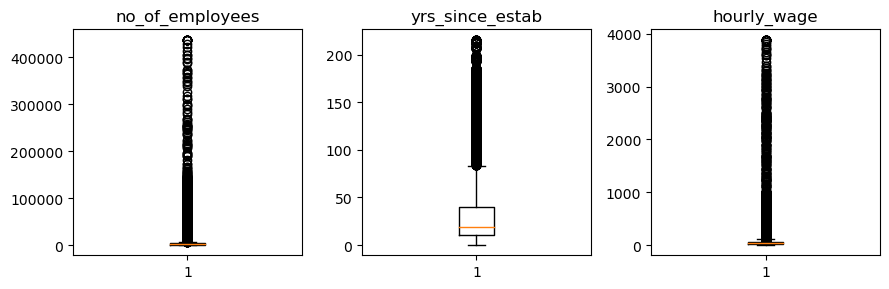

In [52]:
# Use boxplots to check distributions again
plt.figure(figsize=(9, 3))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [53]:
# Check statistical summary in updated data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5630.775706,22078.852294,11.000000,1022.00000,2109.000000,3504.000000,437064.000
yrs_since_estab,25480.0,36.590071,42.366929,0.000000,11.00000,19.000000,40.000000,216.000
hourly_wage,25480.0,94.380687,269.453980,0.048077,22.64806,39.826663,60.012036,3888.139


#### Observations:

* Data set is updated with changes made
* Duplicate value check - Missing value treatment - Outlier Detection/treatment - Feature Engineering steps are complete


### Data Preparation for modeling

- Goal is to predict which visa will be certified
- Encode categorical features
- split data into train and test for model evaluation


### Replace case status 'Certified' with 1 and 'Denied' with 0
### Encode columns has_job_experience,  requires_job_training, full_time_position, education_of_employee

In [54]:
# Replace 'Y' with 1 and 'N' with 0 for columns has_job_experience, requires_job_training, and full_time_position

data.has_job_experience = data.has_job_experience.apply(lambda x: 1 if x == "Y" else 0)
data.requires_job_training = data.requires_job_training.apply(
    lambda x: 1 if x == "Y" else 0
)
data.full_time_position = data.full_time_position.apply(lambda x: 1 if x == "Y" else 0)
##--------------------------------------------------------------------------------------------
# Replace 'High School' with 1, 'Bachelor's' with 2, 'Master's' with 3, and 'Doctorate' with 4

data.education_of_employee = data.education_of_employee.apply(
    lambda x: 1
    if x == "High School"
    else (2 if x == "Bachelor's" else (3 if x == "Master's" else 4))
)
##--------------------------------------------------------------------------------------------
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1) ## drop case status from data
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)  ## create dummies for X 

# Splitting data in train and test sets in the ratio 70:30

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=1, stratify=Y)

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 19)
Shape of test set :  (7644, 19)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion


### Model can make wrong predictions as:

1. Visa application will get certified but in reality, application gets denied.
2. Visa application will not be certified but in reality, application gets certified. 

### Which case is more important? 

* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 

### How to reduce the losses?

* `F1 Score` to be used as evaluation metric, greater the F1 score, higher the chances of minimizing False Negatives and False Positives. 
* Balanced class weights to be used, so model focuses equally on both classes.


**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building and Hyperparameter tuning - Bagging

### Decision Tree Model building

In [58]:
## define decision tree classifier with random state = 1
d_tree_model = DecisionTreeClassifier(random_state=1) 

## fit decision tree classifier on train data 
d_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

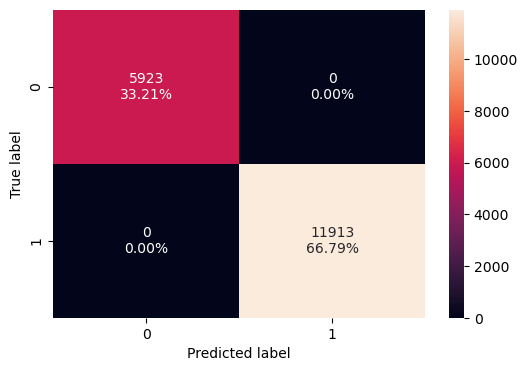

In [59]:
## confusion matrix for train data
confusion_matrix_sklearn(d_tree_model,X_train,y_train)

In [60]:
## check performance on train data
decision_tree_perf_train = model_performance_classification_sklearn(d_tree_model,X_train,y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

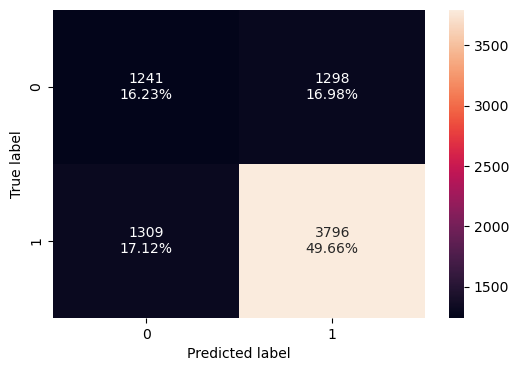

In [61]:
## confusion matrix for test data
confusion_matrix_sklearn(d_tree_model,X_test,y_test)

In [62]:
## check performance for test data
decision_tree_perf_test = model_performance_classification_sklearn(d_tree_model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.658948,0.743585,0.74519,0.744387


#### Observations:

* Untuned decision tree is overfitting training data - all metrics accuracy,recall,precision,and F1-score are 1.00
* Test set (F1-score is 0.74) is generalizing well
* There is need for hyperparameter tuning through grid search


### Decision Tree - Hyperparameter Tuning

In [63]:
%%time
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run grid search with n_jobs = -1
grid_obj = GridSearchCV(dtree_estimator,parameters,scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

Wall time: 4.38 s


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

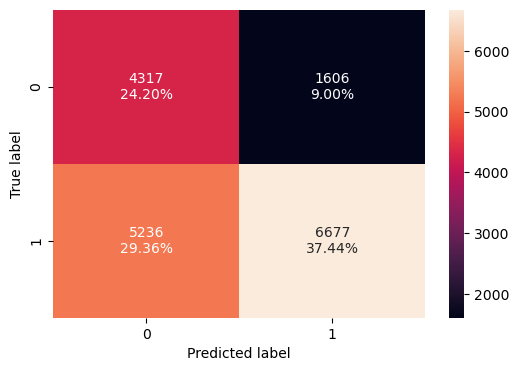

In [64]:
## confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(dtree_estimator,X_train, y_train)

In [65]:
## check performance for train data on tuned estimator

dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator,X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.616394,0.56048,0.806109,0.66122


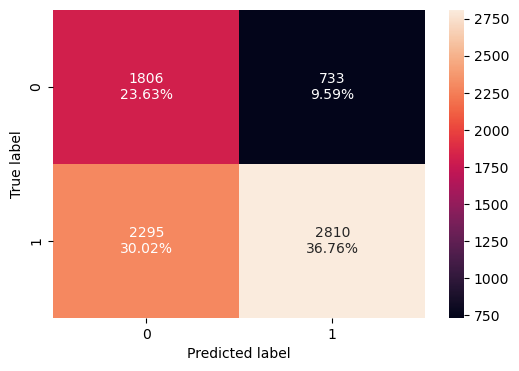

In [66]:
## confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(dtree_estimator,X_test, y_test)

In [67]:
## check performance for test data on tuned estimator
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.603872,0.550441,0.793113,0.649861


In [68]:
# Training performance comparison: 

models_training_comp_df = pd.concat(
    [decision_tree_perf_train.T,
     dtree_estimator_model_train_perf.T,
    ], axis=1,
)

models_training_comp_df.columns = [
    "Decision_tree_default",
    "Decision_tree_tuned",
]

print("Training performance comparison:")
models_training_comp_df

Training performance comparison:


,Decision_tree_default,Decision_tree_tuned
Accuracy,1.0,0.616394
Recall,1.0,0.560480
Precision,1.0,0.806109
F1,1.0,0.661220


In [69]:
# Testing performance comparison: 

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T,
     dtree_estimator_model_test_perf.T,
    ], axis=1,
)

models_test_comp_df.columns = [
    "Decision_tree_default",
    "Decision_tree_tuned",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision_tree_default,Decision_tree_tuned
Accuracy,0.658948,0.603872
Recall,0.743585,0.550441
Precision,0.745190,0.793113
F1,0.744387,0.649861


#### Observations: 

* Tuned decision tree does not improve model performance compared to untuned tree (F1 - 75%)
* F1 score on tuned tree dropped to 65% as did other metrics, while precision improved slightly


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier Model Building

In [70]:
#base_estimator for bagging classifier is a decision tree by default

## define bagging classifier with random state = 1
bagging_classifier = BaggingClassifier(random_state=1)

## fit bagging classifier on the train data
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

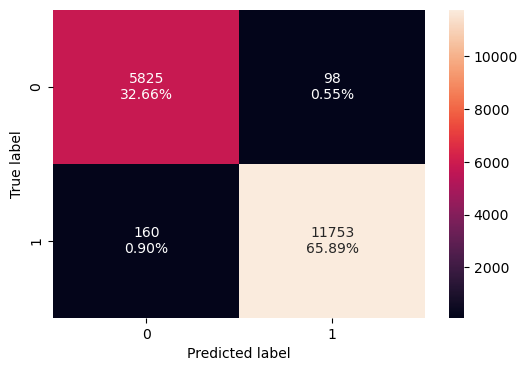

In [71]:
## create confusion matrix for train data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [72]:
## check performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf


,Accuracy,Recall,Precision,F1
0,0.985535,0.986569,0.991731,0.989143


#### Checking model performance on test set

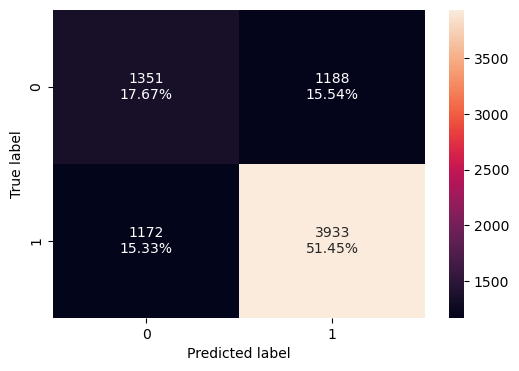

In [73]:
## create confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [74]:
## check performance for test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691261,0.770421,0.768014,0.769216


#### Observations: 

* With default parameters, training data is overfitting (all metrics are about 99%)
* In testing data, accuracy - dropped to 69%, recall, precision and F1 have dropped to 76-77% 
* Lets use hyperparameter tuning to optimize model performance

### Bagging Classifier - Hyperparameter Tuning

In [75]:
%%time
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train) ##  fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Wall time: 3min 41s


BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=110,
                  random_state=1)

#### Checking model performance on training set

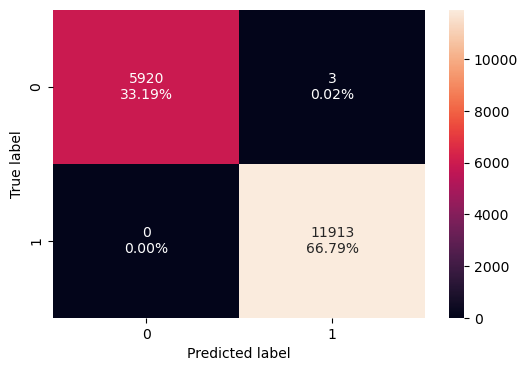

In [76]:
## create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_train,y_train)

In [77]:
## check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train) 
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999832,1.0,0.999748,0.999874


#### Checking model performance on test set

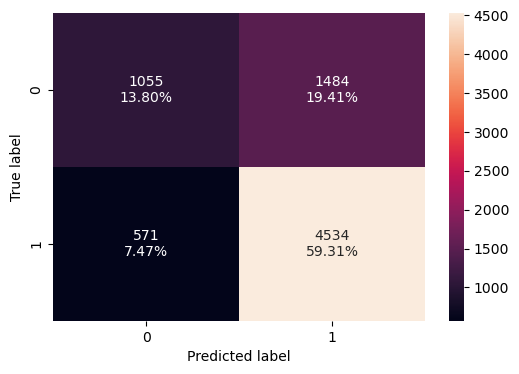

In [78]:
## create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

In [79]:
## check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test, y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731162,0.888149,0.753406,0.815248


In [80]:
# Training performance comparison - Bagging

models_training_comp_df = pd.concat(
    [bagging_classifier_model_train_perf.T,
     bagging_estimator_tuned_model_train_perf.T,
    ], axis=1,
)

models_training_comp_df.columns = [
    "Bagging_Classifier_untuned",
    "Bagging_Classifier_tuned",
]

print("Training performance comparison: Bagging")
models_training_comp_df

Training performance comparison: Bagging


,Bagging_Classifier_untuned,Bagging_Classifier_tuned
Accuracy,0.985535,0.999832
Recall,0.986569,1.000000
Precision,0.991731,0.999748
F1,0.989143,0.999874


In [81]:
# Testing performance comparison - Bagging

models_testing_comp_df = pd.concat(
    [bagging_classifier_model_test_perf.T,
     bagging_estimator_tuned_model_test_perf.T,
    ], axis=1,
)

models_testing_comp_df.columns = [
    "Bagging_Classifier_untuned",
    "Bagging_Classifier_tuned",
]

print("Testing performance comparison: Bagging")
models_testing_comp_df

Testing performance comparison: Bagging


,Bagging_Classifier_untuned,Bagging_Classifier_tuned
Accuracy,0.691261,0.731162
Recall,0.770421,0.888149
Precision,0.768014,0.753406
F1,0.769216,0.815248


#### Observations:

* Bagging classifier tuned model is performing better overall, F1 on train data is overfitting but on test data is 81%
* Bagging classifier untuned model is overfitting data (all training metrics are much higher than testing metrics)
* Accuracy and Recall have gone up after tuning while precision has slightly dropped


### Random Forest Model Building

In [82]:
# Fitting the model
## define random forest with random state = 1 and class_weight = balanced
rf_estimator = RandomForestClassifier(random_state=1,class_weight ="balanced")
rf_estimator.fit(X_train,y_train) ## fit random forest on the train data


RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

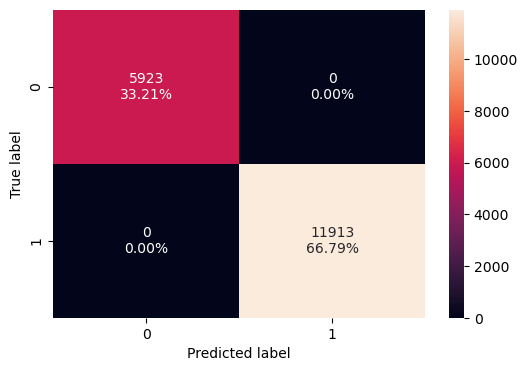

In [83]:
## create confusion matrix for train data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [84]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator,X_train, y_train) ## check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

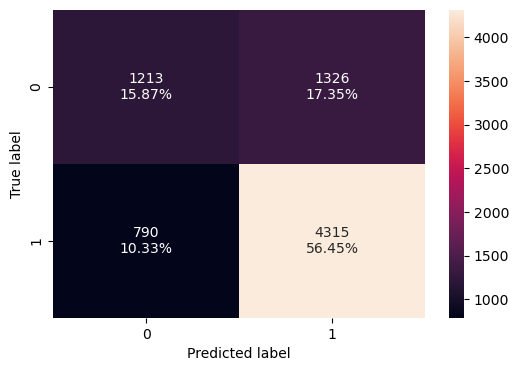

In [85]:
## create confusion matrix for test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [86]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator,X_test,y_test) ## check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.723182,0.84525,0.764935,0.80309


#### Observations:

* Random Forest classifier is overfitting train data but test data is performing ok - F1 score 80%
* Lets improve model performance by hyperparameter tuning


### Hyperparameter Tuning - Random Forest

In [87]:
%%time
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, n_jobs=-1,cv=5) ## grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train,y_train) ## fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Wall time: 5.2 s


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=25, random_state=1)

#### Checking model performance on training set

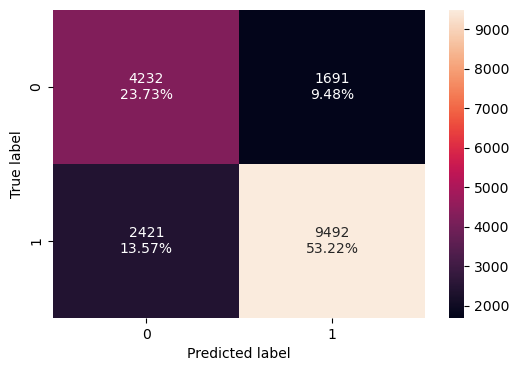

In [88]:
## create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [89]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train,y_train) ## check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769455,0.796777,0.848788,0.821961


#### Checking model performance on test set

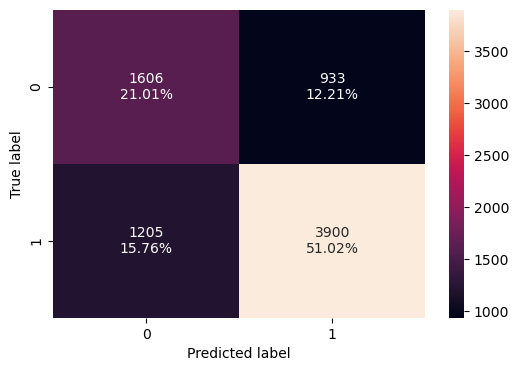

In [90]:
## create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [91]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned,X_test,y_test) ## check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720304,0.763957,0.806952,0.784866


In [92]:
# Training performance comparison - Random Forest Classifier

models_training_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,
     rf_tuned_model_train_perf.T,
    ], axis=1,
)

models_training_comp_df.columns = [
    "Random_Forest_Classifier_untuned",
    "Random_Forest_Classifier_tuned",
]

print("Training performance comparison: RandomForest_Classifier")
models_training_comp_df

Training performance comparison: RandomForest_Classifier


,Random_Forest_Classifier_untuned,Random_Forest_Classifier_tuned
Accuracy,1.0,0.769455
Recall,1.0,0.796777
Precision,1.0,0.848788
F1,1.0,0.821961


In [93]:
# Testing performance comparison - RandomForest Classifier

models_testing_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,
     rf_tuned_model_test_perf.T,
    ], axis=1,
)

models_testing_comp_df.columns = [
    "RandomForest_Classifier_untuned",
    "RandomForest_Classifier_tuned",
]

print("Testing performance comparison: RandomForest")
models_testing_comp_df

Testing performance comparison: RandomForest


,RandomForest_Classifier_untuned,RandomForest_Classifier_tuned
Accuracy,0.723182,0.720304
Recall,0.845250,0.763957
Precision,0.764935,0.806952
F1,0.803090,0.784866


#### Observations:

* Random Forest tuned model F1 value has slightly dropped(78%) compared to un-tuned model(80%)
* Accuracy is the same 72%
* Tuned model precision is higher (80%) vs un-tuned model (76%)
* Recall of tuned model has a slight drop (76%) vs untuned model (84%)


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier Model Building

In [94]:
ab_classifier = AdaBoostClassifier(random_state=1) ## define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train,y_train) ## fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

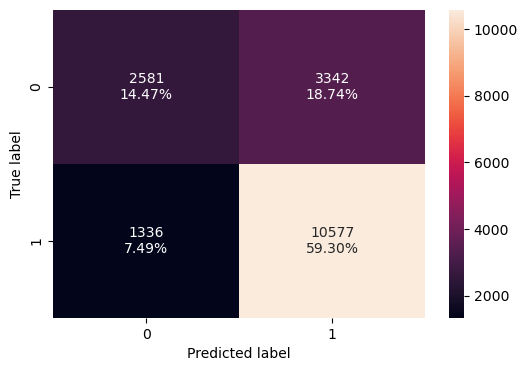

In [95]:
## create confusion matrix for train data
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [96]:
 ## check performance on train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.737721,0.887854,0.759897,0.818907


#### Checking model performance on test set

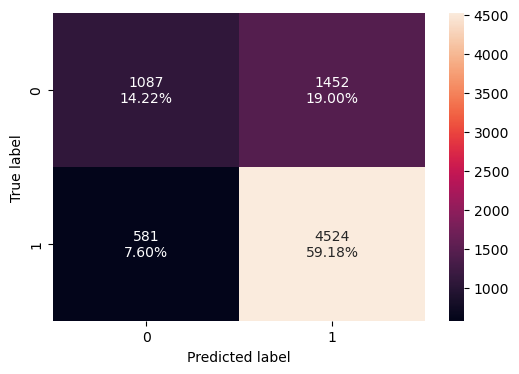

In [97]:
## confusion matrix for test data
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [98]:
## check performance for test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.73404,0.88619,0.757028,0.816533


#### Observations:

* Default AdaBoost model is not showing significant changes in train vs test dataset
* All metrics are about the same (Accuracy - 73%, Recall - 88%, Precision - 75%, F1 - 81%)
* Lets use hyperparameter tuning to improve model performance

###  AdaBoost Classifier - Hyperparameter tuning

In [99]:
%%time
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

Wall time: 3min 2s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

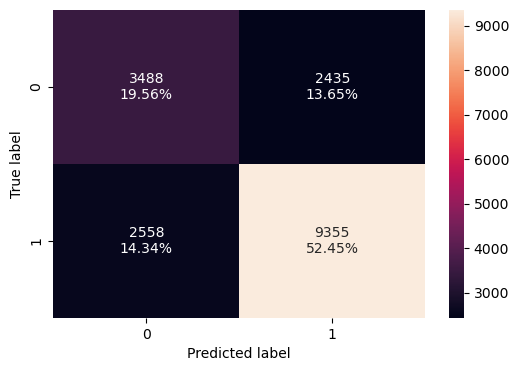

In [100]:
## create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [101]:
## check performance for train data on tuned estimator
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.720061,0.785277,0.793469,0.789352


#### Checking model performance on test set

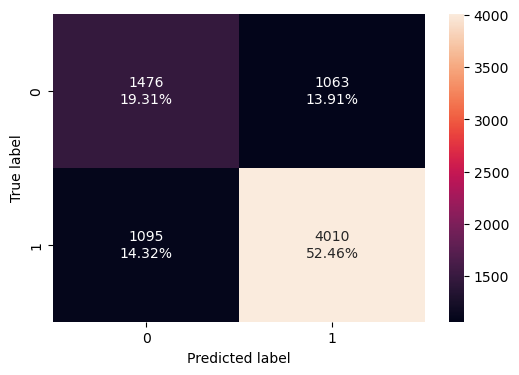

In [102]:
## confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [103]:
## check performance for test data on tuned estimator
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.717687,0.785504,0.790459,0.787974


In [104]:
# Training performance comparison - AdaBoost Classifier

models_training_comp_df = pd.concat(
    [ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,
    ], axis=1,
)

models_training_comp_df.columns = [
    "AdaBoost_Classifier_untuned",
    "AdaBoost_Classifier_tuned",
]

print("Training performance comparison: AdaBoost_Classifier")
models_training_comp_df

Training performance comparison: AdaBoost_Classifier


,AdaBoost_Classifier_untuned,AdaBoost_Classifier_tuned
Accuracy,0.737721,0.720061
Recall,0.887854,0.785277
Precision,0.759897,0.793469
F1,0.818907,0.789352


In [105]:
# Testing performance comparison - AdaBoost_Classifier

models_testing_comp_df = pd.concat(
    [ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,
    ], axis=1,
)

models_testing_comp_df.columns = [
    "AdaBoost_Classifier_untuned",
    "AdaBoost_Classifier_tuned",
]

print("Testing performance comparison: AdaBoost_Classifier")
models_testing_comp_df

Testing performance comparison: AdaBoost_Classifier


,AdaBoost_Classifier_untuned,AdaBoost_Classifier_tuned
Accuracy,0.734040,0.717687
Recall,0.886190,0.785504
Precision,0.757028,0.790459
F1,0.816533,0.787974


#### Observations:

* AdaBoost classifier tuned model has small drop in F1 (78%) compared to untuned model (81%)
* Precision has a slight improvement but accuracy,recall dropped after tuning
* No significant performance improvement observed from AdaBoost hyperparameter tuning on F1 score


### Gradient Boosting Classifier - Model Building

In [106]:
## define Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)
## fit Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

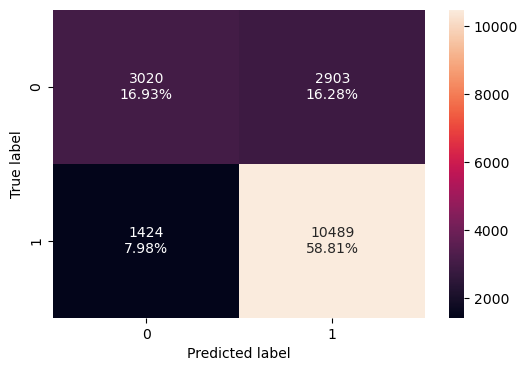

In [107]:
## create confusion matrix for train data
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [108]:
 ## check performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.757401,0.880467,0.783229,0.829006


#### Checking model performance on test set

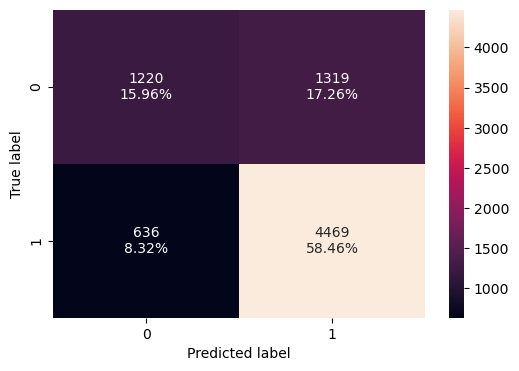

In [109]:
## create confusion matrix for test data
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [110]:
## check performance for test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.875416,0.772115,0.820527


#### Observations:

* GradientBoost classifier test data shows F1 score 82% vs train data(83%)
* No significant difference between accuracy, recall or precision between train and test models
* Lets use hyperparameter training to improve model performance

### Hyperparameter Tuning - Gradient Boosting Classifier

In [111]:
%%time
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train,y_train) ## fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Wall time: 5min 33s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

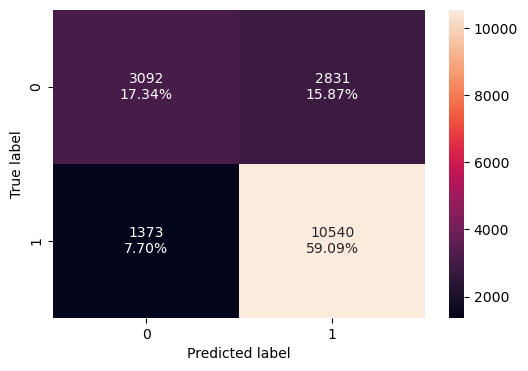

In [112]:
## create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [113]:
## check performance for train data on tuned estimator
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764297,0.884748,0.788273,0.833729


#### Checking model performance on test set

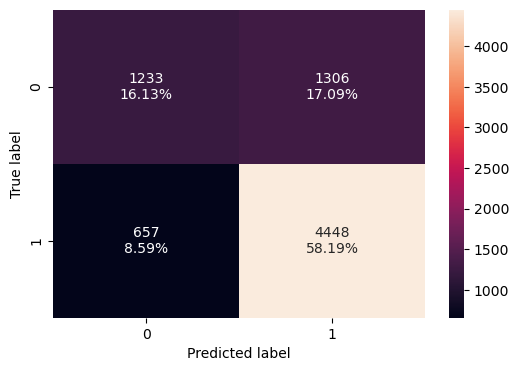

In [114]:
## create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [115]:
## check performance for test data on tuned estimator
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test, y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743197,0.871303,0.773027,0.819228


In [116]:
# Training performance comparison: 

models_training_comp_df = pd.concat(
    [gb_classifier_model_train_perf.T,
     gbc_tuned_model_train_perf.T,
    ], axis=1,
)

models_training_comp_df.columns = [
    "Gradient_Boost_untuned",
    "Gradient_Boost_tuned",
]

print("Training performance comparison:")
models_training_comp_df

Training performance comparison:


,Gradient_Boost_untuned,Gradient_Boost_tuned
Accuracy,0.757401,0.764297
Recall,0.880467,0.884748
Precision,0.783229,0.788273
F1,0.829006,0.833729


In [117]:
# Testing performance comparison: 

models_training_comp_df = pd.concat(
    [gb_classifier_model_test_perf.T,
     gbc_tuned_model_test_perf.T,
    ], axis=1,
)

models_testing_comp_df.columns = [
    "Gradient_Boost_untuned",
    "Gradient_Boost_tuned",
]

print("Testing performance comparison:")
models_testing_comp_df

Testing performance comparison:


,Gradient_Boost_untuned,Gradient_Boost_tuned
Accuracy,0.734040,0.717687
Recall,0.886190,0.785504
Precision,0.757028,0.790459
F1,0.816533,0.787974


#### Observations:

* F1 score on tuned Gradient Boost classfier shows slight drop (78%) vs un-tuned Gradient Boost Classifier (81%)
* Precision on tuned classifer shows slight improvement (79%) vs untuned (75%)
* No improvement in accuracy and recall metrics from Gradient Boost tuning


### XGBoost Classifier

In [118]:
## define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state=1, eval_metric ="logloss")

## fit XGBoost Classifier on the train data
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

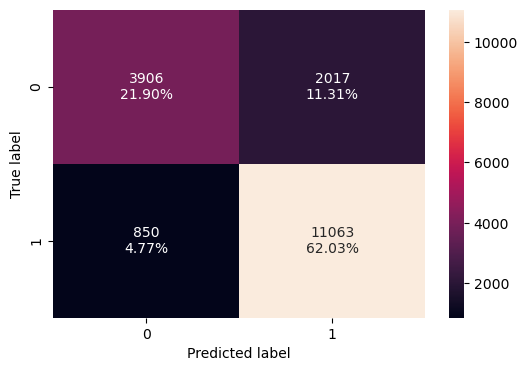

In [119]:
## create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [120]:
## check performance on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.839258,0.928649,0.845795,0.885288


#### Checking model performance on test set

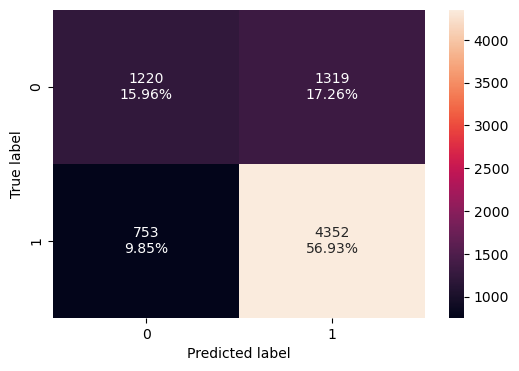

In [121]:
## create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [122]:
 ## check performance for test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.728938,0.852498,0.767413,0.807721


#### Observations on XGBoost Classifier:

* F1 score on test data is 80% vs train (88%)
* no improvement in model performance in test data
* Lets use hyperparameter tuning to improve model performance


### Hyperparameter Tuning - XGBoost Classifier

In [123]:
%%time
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5) ## run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) ## fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Wall time: 20min


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

#### Checking model performance on training set

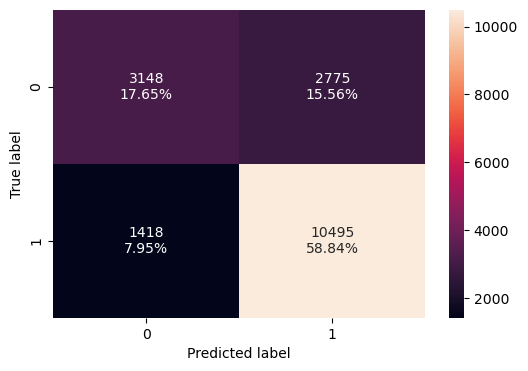

In [124]:
## create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [125]:
## check performance for train data on tuned estimator
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) 
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764914,0.88097,0.790882,0.833499


#### Checking model performance on test set

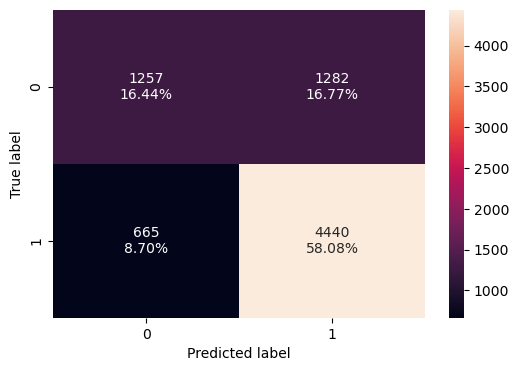

In [126]:
##create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [127]:
## check performance for test data on tuned estimator
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74529,0.869736,0.775952,0.820172


In [128]:
# Training performance comparison - XGBoost

models_training_comp_df = pd.concat(
    [xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T,
    ], axis=1,
)

models_training_comp_df.columns = [
    "XGB_Classifier_untuned",
    "XGB_Classifier_tuned",
]

print("Training performance comparison: XGBoost")
models_training_comp_df

Training performance comparison: XGBoost


,XGB_Classifier_untuned,XGB_Classifier_tuned
Accuracy,0.839258,0.764914
Recall,0.928649,0.880970
Precision,0.845795,0.790882
F1,0.885288,0.833499


In [129]:
# Testing performance comparison: 

models_training_comp_df = pd.concat(
    [xgb_classifier_model_test_perf.T,
     xgb_tuned_model_test_perf.T,
    ], axis=1,
)

models_testing_comp_df.columns = [
    "XGBoost_untuned",
    "XGBoost_tuned",
]

print("Testing performance comparison:")
models_testing_comp_df

Testing performance comparison:


,XGBoost_untuned,XGBoost_tuned
Accuracy,0.734040,0.717687
Recall,0.886190,0.785504
Precision,0.757028,0.790459
F1,0.816533,0.787974


#### Observations on XGBoost classifier hyperparameter tuning:

* Tuned model shows small drop in F1 score and other metrics but model is performing well overall


## Stacking Classifier

In [130]:
%%time
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

## Code to define Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

## fit Stacking Classifier on the train data
stacking_classifier.fit(X_train,y_train)


Wall time: 28.6 s


StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=...
                                                 gpu_id=None, grow_policy=None,
     

### Checking model performance on training set

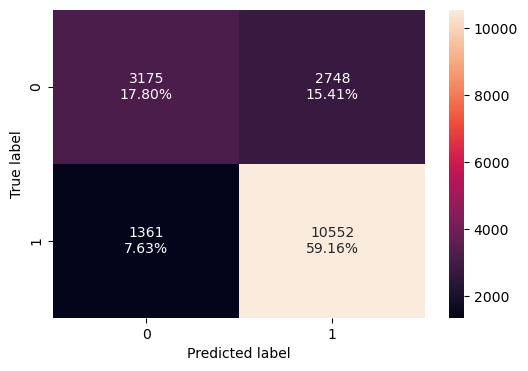

In [131]:
## create confusion matrix for train data
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [132]:
## check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) 
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769623,0.885755,0.793383,0.837029


### Checking model performance on test set

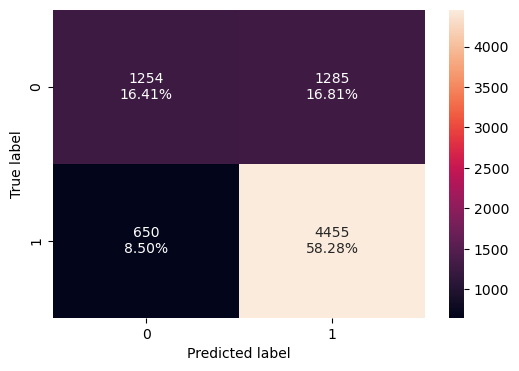

In [133]:
## create confusion matrix for test data
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [134]:
## check performance for test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74686,0.872674,0.776132,0.821577


#### Observations on Stacking Classifier:

* Stacking classifier shows 81% F1 score on test data vs train data(83%)
* No significant improvement between train and test data on other metrics


## Model Performance Comparison and Final Model Selection

In [135]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.616394,0.985535,0.999832,1.0,0.769455,0.737721,0.720061,0.757401,0.764297,0.839258,0.764914,0.769623
Recall,1.0,0.560480,0.986569,1.000000,1.0,0.796777,0.887854,0.785277,0.880467,0.884748,0.928649,0.880970,0.885755
Precision,1.0,0.806109,0.991731,0.999748,1.0,0.848788,0.759897,0.793469,0.783229,0.788273,0.845795,0.790882,0.793383
F1,1.0,0.661220,0.989143,0.999874,1.0,0.821961,0.818907,0.789352,0.829006,0.833729,0.885288,0.833499,0.837029


In [136]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier
Accuracy,0.658948,0.603872,0.691261,0.731162,0.723182,0.720304,0.734040,0.717687,0.744244,0.743197,0.728938,0.745290,0.746860
Recall,0.743585,0.550441,0.770421,0.888149,0.845250,0.763957,0.886190,0.785504,0.875416,0.871303,0.852498,0.869736,0.872674
Precision,0.745190,0.793113,0.768014,0.753406,0.764935,0.806952,0.757028,0.790459,0.772115,0.773027,0.767413,0.775952,0.776132
F1,0.744387,0.649861,0.769216,0.815248,0.803090,0.784866,0.816533,0.787974,0.820527,0.819228,0.807721,0.820172,0.821577


## Final Model

* Tuned XGBoost with F1 score 82%  is the final chosen model (comparing all metrics overall among other models)

### Important features of the final model - Tuned XGBoost

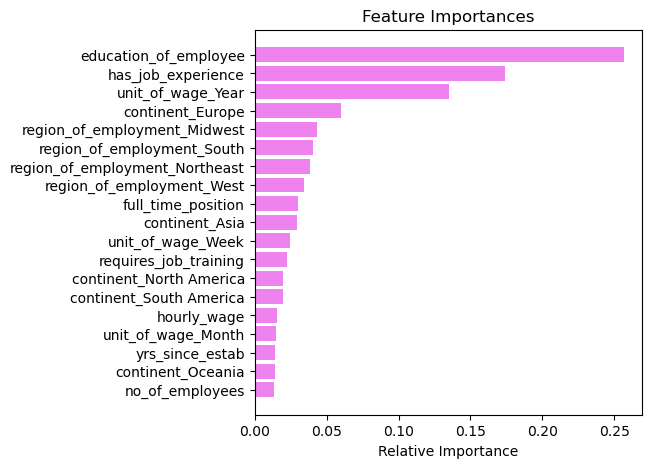

In [137]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations

* 66% of visa applicants are from Asian continent, which is not surprising due to its size
* 78% of applicants have either Masters(38%) or Bachelors degree(40%). ~8% applicants have Doctorate degree
* 58% of applicants have job experience
* 88% of visa appplicants do not require job training
* Northeast(28%), South(27%), and West (25%) of the US are popular geographical regions for these jobs
* Employer age has a negligible effect on visa certification likelihood
* 90% of positions requesting visa have an Yearly wage unit
* 89% of positions requesting visa are full-time
* 67% of visa applications get certified
* 87% of Doctorate degree holders are certified, 78% certification - Masters degree, 62% for Bachelors degree
* only 34% high school educated applicants are certified


## Insights from EDA

* Higher the education level of an applicant, higher the chances of visa certification
* Europe has the highest success rate(~80%) of getting certified
* South America has the lowest success rate of getting certified (40%)
* Having job experience improves likelihood of visa certification (74% of applicants with job experience are certified)
* Annual wage unit is most likely to be certified (72%), hourly wage has the least likelihood (34%)
* Number of employees of applicant's employer does not impact visa certification significantly
* Age of employer(year_since_established) does not impact visa certification significantly


## Model performance comparison (Bagging)

* Models built using Bagging algorithms: Decision tree, Bagging classifier, Random Forest Classifier
* F1 score across these 3 models is about the same (79-81%)


## Model performance comparison (Boosting)

* Models built using Boosting algorithms: AdaBoost, Gradient Boost, XGBoost, Stacking
* F1 score across these 4 models is about the same (78-82%)
* Accuracy across these 4 models is about the same (71-74%)

## Final Model comparison on metrics

* Tuned Decision tree is underperforming, Tuned Bagging classifier has highest recall, Tuned Random Forest,Tuned Adaboost, Tuned Gradient Boost have comparable metrics

* Due to XGBoost's high computational speed, scalability, parallel implemenation, cross-validation, cache-optimization and distributed computation capabilities, Tuned xgboost is final choice

*  Tuned XGBoost classifier is final model choice overall  (F1 82%, accuracy 74%, precision 77% and recall  87%)

## Final model feature importance

* Applicant education level (education_of_employee), job experience (has_job_experience), Annual pay unit (unit_of_wage_Year) are top variables influencing visa certification. European continent origin adds more weightage to certification likelihood
* Year of establishment of employer and number of employees of applicant's employer do not significantly impact visa certification


## Recommendations

* Tuned XGBoost classifier is recommended to OFLC(Office of Foreign Labor Certification) as final model

* An applicants' level of education, job experience, and annual pay unit are the top/most popular factors impacting visa certification

* Applicants who have a higher education, have job experience, and their US employment wage unit is annual, have a high likelihood of getting a certified work visa. 

* In addition, being from Europe increases visa certification chances

* OFLC must look at additional factors in building visa certification model: employment industry,  age of applicant, employment agreement between applicant and employer to understand job description, paid leave, sick leave etc to make sure applicant is sufficently qualified to perform role, employer's socioeconomic contribution to US economy for modeling

* OFLC must consider factors like whether applicant was previously denied a visa to the US for any reason, their social background check in country of residence before certifying visa

* OFLC can offer expedited visa processing centers based on popular regions of visa applications

* OFLC must be transparent about visa processing times and status updates on visa application

* OFLC can have region specific models or employment industry specific ML classification models to help expedite visa processing
